In [9]:
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline  
# %matplotlib notebook
# %pylab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import time

### Ax: considering each column in A, aka finding significant signal senders
(Rows are normalized, each row sum to 1)

In [21]:
data = np.load('adaptive_adj.npy')
data = data.sum(1)
data.shape

(1744, 200)

In [11]:
data

array([[0.30711946, 0.29864472, 0.19583644, ..., 0.44492763, 0.3058579 ,
        0.74946904],
       [5.4609776 , 1.2738707 , 3.179132  , ..., 0.4400004 , 0.91452205,
        0.784815  ],
       [0.255053  , 0.8369114 , 0.22362407, ..., 9.122564  , 1.1893704 ,
        0.24911596],
       ...,
       [0.6434032 , 0.5635878 , 1.0612541 , ..., 1.8775764 , 1.5075426 ,
        0.7058273 ],
       [1.2597243 , 0.6558998 , 0.45250636, ..., 0.45569003, 0.94192964,
        0.7717036 ],
       [0.418548  , 0.6485443 , 3.7606351 , ..., 0.48685932, 0.77455366,
        1.1594348 ]], dtype=float32)

Explained variation per principal component: [0.08176566 0.06771377 0.05453461 0.0441812  0.03288775 0.02978683
 0.02636923 0.02399271 0.02007767 0.0192298  0.01720401 0.01693223
 0.01518819 0.01459808 0.01338969]
Total explanability: 0.4778514


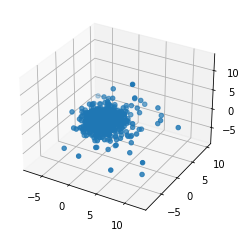

In [22]:
pca = PCA(n_components=15)
pca_result = pca.fit_transform(data)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Total explanability:', pca.explained_variance_ratio_.sum())

ax = plt.figure().gca(projection='3d')
ax.scatter(pca_result[:,0], pca_result[:,1], pca_result[:,2])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1744 samples in 0.028s...
[t-SNE] Computed neighbors for 1744 samples in 0.802s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1744
[t-SNE] Computed conditional probabilities for sample 1744 / 1744
[t-SNE] Mean sigma: 0.661540
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.408401
[t-SNE] KL divergence after 300 iterations: 2.823395
t-SNE done! Time elapsed: 2.8935036659240723 seconds


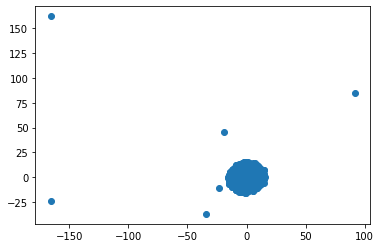

In [23]:
# tsne from data
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
plt.scatter(tsne_results[:,0], tsne_results[:,1])
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1744 samples in 0.003s...
[t-SNE] Computed neighbors for 1744 samples in 0.111s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1744
[t-SNE] Computed conditional probabilities for sample 1744 / 1744
[t-SNE] Mean sigma: 0.471318
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.462349
[t-SNE] KL divergence after 300 iterations: 1.984787
t-SNE done! Time elapsed: 2.459754467010498 seconds


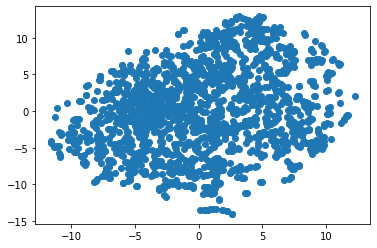

In [24]:
# tsne from pca results
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
plt.scatter(tsne_results[:,0], tsne_results[:,1])
plt.show()

In [25]:
# population mean
mean_data = data.sum(0)

[  2   3   4   5  11  17  20  26  27  28  30  33  34  38  42  47  51  52
  53  54  55  56  58  59  61  62  66  67  68  69  71  77  80  83  84  85
  86  87  88  89  91  93  96  97  98  99 102 104 105 112 116 121 123 125
 129 133 134 143 145 150 151 152 154 157 158 159 160 162 163 166 167 170
 171 172 173 174 175 177 180 184 188 190 191 192 194 195 200]


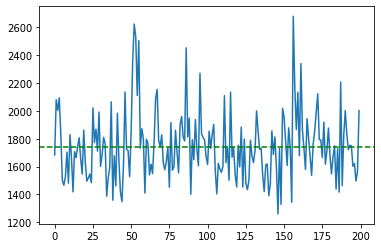

In [20]:
plt.plot(mean_data)
plt.axhline(y=mean_data.mean(), color='g', linestyle='--')
print((np.asarray(np.where(mean_data > mean_data.mean()))+1).squeeze())

[  1  13  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30
  31  32  33  35  36  38  39  40  41  44  45  46  48  50  57  59  60  61
  62  64  71  73  76  79  82  85  86  90  99 101 102 113 114 115 117 118
 119 120 121 122 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 152 153 156 166 167
 168 169 174 176 178 179 181 182 184 185 189 190 192 193 197 198 199 200]


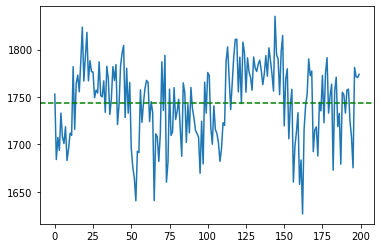

In [26]:
plt.plot(mean_data)
plt.axhline(y=mean_data.mean(), color='g', linestyle='--')
print((np.asarray(np.where(mean_data > mean_data.mean()))+1).squeeze())

https://github.com/ThomasYeoLab/CBIG/blob/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/Schaefer2018_200Parcels_17Networks_order.txt

**check: 13-50, 113-156** (additional: 75-89, 175-200)

**SomMot(somatomotor), DorsAttn(dorsal attention), SalVentAttn(salience/ventral attention)**
(13-50 LH and 113-156 RH)

DMN: 75-98, 184-196


"Also, to see if the revealed channel-wise topology resembled the intrinsic network organization of the brain, we sorted the 62 channels into 6 groups to represent the activity of previously established resting-state networks41 (RSNs). These included the visual (VN), somatomotor (SM), dorsal attention (DA), ventral attention and limbic (VAL), frontoparietal (FP) and default mode (DMN) networks." from https://www.nature.com/articles/s41598-019-49726-5

Other resources regarding resting state networks:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3174820/ (7/17 networks --- Actually Schaefer2018 parcellation is based on this!)

<IPython.core.display.Javascript object>


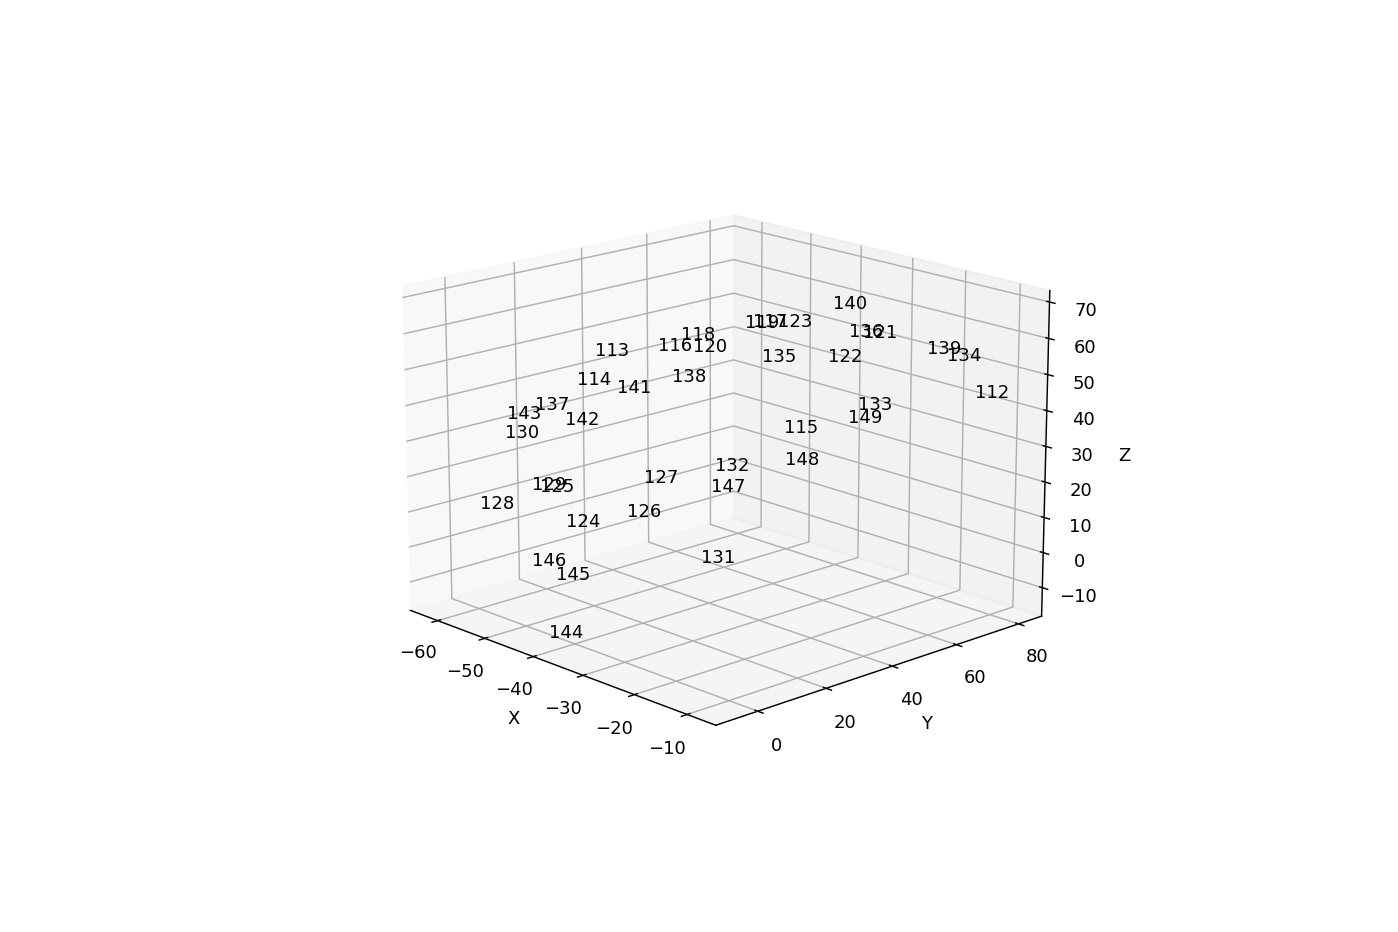

In [26]:
coor_mri = np.loadtxt('/host/data/MRI_EEG/utils/eeg_coor_conv/Schaefer2018_200Parcels_17Networks_order_FSLMNI152_2mm.txt', usecols=(3,4,5,6))

coor_mean = []

for i in range(112,150):
    cur_coor = list(coor_mri[coor_mri[:,-1] == i][:,:3].mean(0))
    cur_coor.append(i)
    coor_mean.append(cur_coor)

coor_mean = np.stack(coor_mean).astype(np.float16)

'''plot region number in 3d space'''
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(len(coor_mean)):
    ax.text(coor_mean[i,0], coor_mean[i,1], coor_mean[i,2], str(int(coor_mean[i,3])))

ax.set_xlim(coor_mean[:,0].min()-1, coor_mean[:,0].max()+1)
ax.set_ylim(coor_mean[:,1].min()-1, coor_mean[:,1].max()+1)
ax.set_zlim(coor_mean[:,2].min()-1, coor_mean[:,2].max()+1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()